# POC/PON data

Let's first load in some libraries that we are going to use today. If you are not sure whether you have the library installed, you can embed *install.packages* within an *if* statement, like this

In [1]:
if (!requireNamespace("RNetCDF", quietly = TRUE)) {
  install.packages("RNetCDF")
}
library(RNetCDF)
if (!requireNamespace("writexl", quietly = TRUE)) {
  install.packages("writexl")
}
library(writexl)

## Accessing the data

These data have been published to NIRD RDA which, at the time of writing, is currently not making data available via THREDDS and OPeNDAP. Therefore, we need to download the files to our local computer.

Go to the SIOS data access portal:
https://sios-svalbard.org/metsis/search?f%5B0%5D=dataset_level%3ALevel-1

Filter by the collection *AeN* on the right hand panel to find all Nansen Legacy data. This will take you to here:
https://sios-svalbard.org/metsis/search?f%5B0%5D=collection%3AAeN&f%5B1%5D=dataset_level%3ALevel-1

Search for *POC* in the free-text search in the left hand panel. This will take you to here:
https://sios-svalbard.org/metsis/search?search_api_fulltext_op=and&fulltext=POC&start_date=&end_date=&items_per_page=15&f%5B0%5D=collection%3AAeN&f%5B1%5D=dataset_level%3ALevel-1

There is one publication per cruise. Choose the one you are interested in by clicking on it. Here is the landing page for one of the publications:
https://doi.org/10.11582/2022.00051

There is one file per cast. Download the files you are interested in - the file with the *.nc* suffix only is okay.

## Niskin bottles

In [2]:
relative_filepath <- '../data/POC_and_PON_JC2-2_station_P7_CTD_with_Niskin_bottles.nc'
data <- open.nc(relative_filepath)
print.nc(data)

netcdf netcdf4 {
dimensions:
	depth = 17 ;
	time = 17 ;
variables:
	NC_STRING eventID(depth) ;
		NC_CHAR eventID:long_name = "eventID in the Nansen Legacy logging system, where more metadata can be found about this sample: https://sios-svalbard.org/aen/tools" ;
		NC_CHAR eventID:units = "NA" ;
		NC_CHAR eventID:coverage_content_type = "referenceInformation" ;
	NC_FLOAT poc(depth) ;
		NC_FLOAT poc:_FillValue = 1.00000001504747e+30 ;
		NC_CHAR poc:long_name = "particulate organic carbon of sea water, average concentration" ;
		NC_CHAR poc:units = "mg m^-3" ;
		NC_CHAR poc:coverage_content_type = "physicalMeasurement" ;
		NC_CHAR poc:ancillary_variables = "poc_stdev, poc_replicates" ;
		NC_CHAR poc:cell_methods = "depth: point" ;
	NC_FLOAT poc_stdev(depth) ;
		NC_FLOAT poc_stdev:_FillValue = 1.00000001504747e+30 ;
		NC_CHAR poc_stdev:long_name = "particulate organic carbon of sea water, standard deviation" ;
		NC_CHAR poc_stdev:units = "mg m^-3" ;
		NC_CHAR poc_stdev:coverage_content_type

The variables we are most likely interested in have a single dimension, *depth*. Let's access and plot the data.

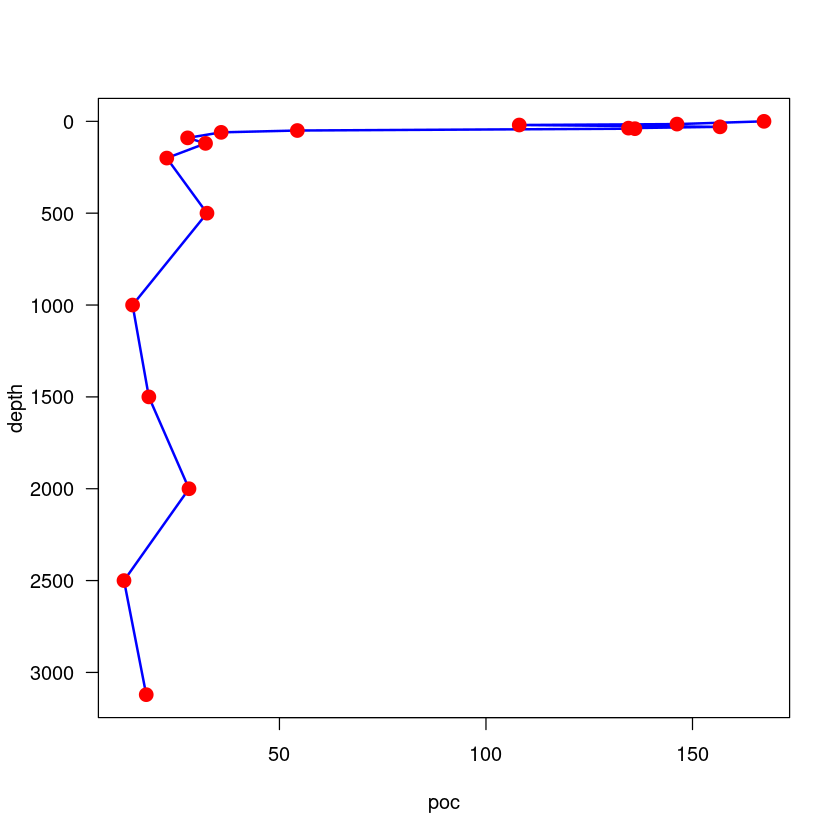

In [3]:
depth <- var.get.nc(data, "depth")
poc <- var.get.nc(data, "poc")

plot(
  poc,
  depth,
  type = "l",
  lwd = 2,     
  col = "blue",
  las = 1,     
  ylim = c(max(depth),0)
)

# Add points on the line plot
points(
  poc, 
  depth, 
  pch = 19, 
  col = "red", 
  cex = 1.5
)

## Data from ice cores



In [4]:
relative_filepath <- '../data/POC_and_PON_JC2-2_station_P8_ice_ice_cores.nc'
data <- open.nc(relative_filepath)
print.nc(data)

netcdf netcdf4 {
dimensions:
	minDepth = 7 ;
	maxDepth = 7 ;
variables:
	NC_STRING eventID(minDepth) ;
		NC_CHAR eventID:long_name = "eventID in the Nansen Legacy logging system, where more metadata can be found about this sample: https://sios-svalbard.org/aen/tools" ;
		NC_CHAR eventID:units = "NA" ;
		NC_CHAR eventID:coverage_content_type = "referenceInformation" ;
	NC_INT numCores(minDepth) ;
		NC_INT numCores:_FillValue = 10000 ;
		NC_CHAR numCores:long_name = "Number of ice cores pooled together to make a single sample" ;
		NC_CHAR numCores:units = "1" ;
		NC_CHAR numCores:coverage_content_type = "referenceInformation" ;
		NC_CHAR numCores:positive = "down" ;
	NC_FLOAT poc(minDepth) ;
		NC_FLOAT poc:_FillValue = 1.00000001504747e+30 ;
		NC_CHAR poc:long_name = "particulate organic carbon of sea ice, average concentration" ;
		NC_CHAR poc:units = "mg m^-3" ;
		NC_CHAR poc:coverage_content_type = "physicalMeasurement" ;
		NC_CHAR poc:ancillary_variables = "poc_stdev, poc_replicates"

In these data, you can see that the data variables have 2 dimensions, *minDepth* and *maxDepth*. However, each data value is representative of a cell - a depth range for each chunk of the ice core that has been melted down.

So all the data variables just have one dimension, *minDepth*.

This is actually not the best, most CF-compliant way to do this. These data are human-readable, but do not follow the recommend best practices. We should have used bounds instead when creating the files. You can read about cell bounds here.
https://cfconventions.org/Data/cf-conventions/cf-conventions-1.11/cf-conventions.html#_data_representative_of_cells

Following the best practices is important as it encourages consistency between datasets and makes it easier for someone to build a service that works on not just one file but all similar files. I will cover how to encode data representative of cells in my tutorial series on working with NetCDF files in R, which is linked here. At the time of writing, this is not complete:
https://lhmarsden.github.io/NetCDF_in_R_from_beginner_to_pro/intro.html

You can access the data in the same way you would the data from the Niskin bottles.

In [5]:
min_depth <- var.get.nc(data,'minDepth')
max_depth <- var.get.nc(data,'maxDepth')
poc <- var.get.nc(data,'poc')
pon <- var.get.nc(data,'pon')

df <- data.frame(
    Min_depth = min_depth, 
    Max_depth = max_depth,
    POC = poc, 
    PON = pon
)

df

Min_depth,Max_depth,POC,PON
<dbl>,<dbl>,<dbl>,<dbl>
0,3,2573.1243,142.27037
3,10,1654.3745,94.35554
10,20,1805.5574,102.02527
20,30,1569.2649,92.12193
30,50,1227.7764,72.65918
50,70,1169.4253,73.34488
70,90,555.1413,44.04702


## Under ice water

In [6]:
relative_filepath <- '../data/POC_and_PON_JC2-2_station_P8_ice_under_ice_water.nc'
data <- open.nc(relative_filepath)
print.nc(data)

netcdf netcdf4 {
dimensions:
	depth = 1 ;
variables:
	NC_STRING eventID(depth) ;
		NC_CHAR eventID:long_name = "eventID in the Nansen Legacy logging system, where more metadata can be found about this sample: https://sios-svalbard.org/aen/tools" ;
		NC_CHAR eventID:units = "NA" ;
		NC_CHAR eventID:coverage_content_type = "referenceInformation" ;
	NC_FLOAT poc(depth) ;
		NC_FLOAT poc:_FillValue = 1.00000001504747e+30 ;
		NC_CHAR poc:long_name = "particulate organic carbon of sea water, average concentration" ;
		NC_CHAR poc:units = "mg m^-3" ;
		NC_CHAR poc:coverage_content_type = "physicalMeasurement" ;
		NC_CHAR poc:ancillary_variables = "poc_stdev, poc_replicates" ;
		NC_CHAR poc:cell_methods = "depth: point" ;
	NC_FLOAT poc_stdev(depth) ;
		NC_FLOAT poc_stdev:_FillValue = 1.00000001504747e+30 ;
		NC_CHAR poc_stdev:long_name = "particulate organic carbon of sea water, standard deviation" ;
		NC_CHAR poc_stdev:units = "mg m^-3" ;
		NC_CHAR poc_stdev:coverage_content_type = "physicalMe

These data are structured in the same was as the data from Niskin bottles, but in this case only 1 or 2 depths have been sampled in each profile.

In [7]:
depth <- var.get.nc(data, "depth")
poc <- var.get.nc(data, "poc")

depth
poc

[1] 0

[1] 135.5052

## Melt ponds

For these data, a dimension *melt_pond_number* has been used to number each of the meltponds sampled. So if multiple melt ponds were sampled, each data point for each variable would be from a different melt pond.

I think the *rmelt_pond_number* is an accidental duplicate that can be ignored.

In [8]:
relative_filepath <- '../data/POC_and_PON_JC2-2_station_P8_ice_melt_ponds.nc'
data <- open.nc(relative_filepath)
print.nc(data)

netcdf netcdf4 {
dimensions:
	melt_pond_number = 3 ;
	rmelt_pond_number = 3 ;
variables:
	NC_STRING eventID(melt_pond_number) ;
		NC_CHAR eventID:long_name = "eventID in the Nansen Legacy logging system, where more metadata can be found about this sample: https://sios-svalbard.org/aen/tools" ;
		NC_CHAR eventID:units = "NA" ;
		NC_CHAR eventID:coverage_content_type = "referenceInformation" ;
	NC_FLOAT poc(melt_pond_number) ;
		NC_FLOAT poc:_FillValue = 1.00000001504747e+30 ;
		NC_CHAR poc:long_name = "particulate organic carbon of melt pond water, average concentration" ;
		NC_CHAR poc:units = "mg m^-3" ;
		NC_CHAR poc:coverage_content_type = "physicalMeasurement" ;
		NC_CHAR poc:ancillary_variables = "poc_stdev, poc_replicates" ;
		NC_CHAR poc:cell_methods = "melt_pond_number: point" ;
	NC_FLOAT poc_stdev(rmelt_pond_number) ;
		NC_FLOAT poc_stdev:_FillValue = 1.00000001504747e+30 ;
		NC_CHAR poc_stdev:long_name = "particulate organic carbon of melt pond water, standard deviation" ;
		

In [9]:
melt_pond_number <- var.get.nc(data,'melt_pond_number')
poc <- var.get.nc(data,'poc')
pon <- var.get.nc(data,'pon')

df <- data.frame(
    Melt_pond_number = melt_pond_number,
    POC = poc, 
    PON = pon
)

df

Melt_pond_number,POC,PON
<dbl>,<dbl>,<dbl>
1,70.68340,9.03695
2,98.05074,13.27174
3,162.79396,22.95190


## Pancake ice


In [10]:
relative_filepath <- '../data/POC_and_PON_JC2-2_station_P9_ice_pancake_ice.nc'
data <- open.nc(relative_filepath)
print.nc(data)

netcdf netcdf4 {
dimensions:
	sample_number = 1 ;
	rsample_number = 1 ;
variables:
	NC_STRING eventID(sample_number) ;
		NC_CHAR eventID:long_name = "eventID in the Nansen Legacy logging system, where more metadata can be found about this sample: https://sios-svalbard.org/aen/tools" ;
		NC_CHAR eventID:units = "NA" ;
		NC_CHAR eventID:coverage_content_type = "referenceInformation" ;
	NC_FLOAT poc(sample_number) ;
		NC_FLOAT poc:_FillValue = 1.00000001504747e+30 ;
		NC_CHAR poc:long_name = "particulate organic carbon of melt pond water, average concentration" ;
		NC_CHAR poc:units = "mg m^-3" ;
		NC_CHAR poc:coverage_content_type = "physicalMeasurement" ;
		NC_CHAR poc:ancillary_variables = "poc_stdev, poc_replicates" ;
		NC_CHAR poc:cell_methods = "sample_number: point" ;
	NC_FLOAT poc_stdev(rsample_number) ;
		NC_FLOAT poc_stdev:_FillValue = 1.00000001504747e+30 ;
		NC_CHAR poc_stdev:long_name = "particulate organic carbon of melt pond water, standard deviation" ;
		NC_CHAR poc_stdev:

For these data, a dimension *sample_number* has been used to number each of the samples. So if samples were taken at a station, each data point for each variable would be from a different sample.

I think the *rsample_number* is an accidental duplicate that can be ignored.

In [11]:
sample_number <- var.get.nc(data,'sample_number')
poc <- var.get.nc(data,'poc')
pon <- var.get.nc(data,'pon')

df <- data.frame(
    Melt_pond_number = sample_number,
    POC = poc, 
    PON = pon
)

df

Melt_pond_number,POC,PON
<dbl>,<dbl>,<dbl>
1,347.9351,36.81747


## Citing the data

Please cite the data for the cruise or cruises you have used the data from.

For the data used in this notebook, the citation is:

*Marquardt, M., Dubourg, P., Reigstad, M. (2022).Concentration of Particulate Organic Carbon (POC) and Particulate Organic Nitrogen (PON) from the sea water and sea ice in the northern Barents Sea as part of the Nansen Legacy project, Cruise 2021710 , JC2-2  [Data set]. Norstore. https://doi.org/10.11582/2022.00051*